<a href="https://colab.research.google.com/github/TonyNewness/Product-Recommendation/blob/main/Copy_of_Main_Group_2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install implicit

In [2]:
import pandas as pd
import numpy as np
import scipy.sparse as sp
from implicit.als import AlternatingLeastSquares
from google.colab import files
from scipy.sparse import coo_matrix, csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import drive
# drive.mount ('/content/drive')

In [3]:
data= pd.read_csv('/content/my_dataframe.csv')

In [4]:
data.head()

,Customer ID,Purchase Date,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Name,Age,Gender,Churn,Item Purchased
0,44605,3/5/2023 21:30,177,0,2427,PayPal,John Rivera,31,Female,0,Blouse
1,44605,16/05/2021 13:57,174,2,2448,PayPal,John Rivera,31,Female,0,Sweater
2,44605,13/07/2020 06:16,413,0,2345,Credit Card,John Rivera,31,Female,0,Jeans
3,44605,17/01/2023 13:14,396,3,937,Cash,John Rivera,31,Female,0,Sandals
4,44605,1/5/2021 11:29,259,3,2598,PayPal,John Rivera,31,Female,0,Blouse


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Customer ID            500000 non-null  int64 
 1   Purchase Date          500000 non-null  object
 2   Product Price          500000 non-null  int64 
 3   Quantity               500000 non-null  int64 
 4   Total Purchase Amount  500000 non-null  int64 
 5   Payment Method         500000 non-null  object
 6   Customer Name          500000 non-null  object
 7   Age                    500000 non-null  int64 
 8   Gender                 500000 non-null  object
 9   Churn                  500000 non-null  int64 
 10  Item Purchased         500000 non-null  object
dtypes: int64(6), object(5)
memory usage: 42.0+ MB


In [6]:
data.drop(columns=['Churn','Customer Name'],axis=1, inplace=True)
data

,Customer ID,Purchase Date,Product Price,Quantity,Total Purchase Amount,Payment Method,Age,Gender,Item Purchased
0,44605,3/5/2023 21:30,177,0,2427,PayPal,31,Female,Blouse
1,44605,16/05/2021 13:57,174,2,2448,PayPal,31,Female,Sweater
2,44605,13/07/2020 06:16,413,0,2345,Credit Card,31,Female,Jeans
3,44605,17/01/2023 13:14,396,3,937,Cash,31,Female,Sandals
4,44605,1/5/2021 11:29,259,3,2598,PayPal,31,Female,Blouse
...,...,...,...,...,...,...,...,...,...
499995,33308,8/10/2023 13:39,279,1,2187,PayPal,55,Male,Sneakers
499996,48835,11/23/2021 1:30,27,0,3615,Credit Card,42,Female,Dress
499997,21019,7/2/2020 14:04,17,5,2466,Cash,41,Male,Belt
499998,49234,12/30/2020 2:02,398,2,3668,Crypto,34,Female,Boots


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Customer ID            500000 non-null  int64 
 1   Purchase Date          500000 non-null  object
 2   Product Price          500000 non-null  int64 
 3   Quantity               500000 non-null  int64 
 4   Total Purchase Amount  500000 non-null  int64 
 5   Payment Method         500000 non-null  object
 6   Age                    500000 non-null  int64 
 7   Gender                 500000 non-null  object
 8   Item Purchased         500000 non-null  object
dtypes: int64(5), object(4)
memory usage: 34.3+ MB


**Number of products that was not returened?**

In [8]:
500000 - 405022

94978

**Number of Items sold in the store?**

In [9]:
data['Item Purchased'].nunique()

25

Unique customer count on dataset

In [10]:
data['Customer ID'].nunique()

49998

Most bought Items by gender

In [11]:
grouped_data = data.groupby(['Gender', 'Item Purchased']).size().reset_index(name='Count')


most_purchased_item = grouped_data.loc[grouped_data.groupby('Gender')['Count'].idxmax()]

# Display the result
most_purchased_item

,Gender,Item Purchased,Count
13,Female,Pants,11061
27,Male,Blouse,10935


Total number of each item sold

In [12]:
# Function to find the total number of each product sold
def most_Sold_Product(data):
  product_Sum = {} # declared empty dictionary to store the total sum of each product
  # The below checks if a product is in the dataframe column 'Item Purchased' exists and finds all it's occurrences in the 'Quantity' column and sum them up
  for name_Of_Product in data['Item Purchased'].unique(): # for every unique product in the column Item Purchased
    total_prod = data[data['Item Purchased'] == name_Of_Product]['Quantity'].sum() # Filter based on the product name and sum all the quantities (in the Quantity column) of the filtered product.
    product_Sum[name_Of_Product] = int(total_prod) #assigns the sum of each product to the empty dictionary created earlier and we convert the total to integer because we want to apply the f-string and it doesn't work on numpy

  #sort the products based on most sold to the least sold
  sorted_product_Sum = sorted(product_Sum.items(), key=lambda x: x[1], reverse=True)

  # Print sum total of products on the dataset
  for name_Of_Product, total_prod in sorted_product_Sum:
    total_prod = f"{total_prod:,}"  # Formats the number with commas
    print('Total', name_Of_Product, 'sold:', total_prod)
  return sorted_product_Sum
# Call the the function to print totals of each sold product from most sold to least sold
sorted_product_Sum = most_Sold_Product(data)

Total Jewelry sold: 57,142
Total Pants sold: 56,817
Total Blouse sold: 56,428
Total Shirt sold: 56,202
Total Dress sold: 55,541
Total Sweater sold: 54,494
Total Jacket sold: 54,258
Total Coat sold: 54,020
Total Belt sold: 53,816
Total Sunglasses sold: 53,443
Total Sandals sold: 53,210
Total Socks sold: 52,799
Total Skirt sold: 52,697
Total Scarf sold: 52,545
Total Shorts sold: 52,286
Total Hat sold: 51,293
Total Handbag sold: 50,855
Total Hoodie sold: 50,246
Total Shoes sold: 49,979
Total T-shirt sold: 48,930
Total Sneakers sold: 48,520
Total Backpack sold: 47,625
Total Boots sold: 47,603
Total Gloves sold: 46,630
Total Jeans sold: 41,334


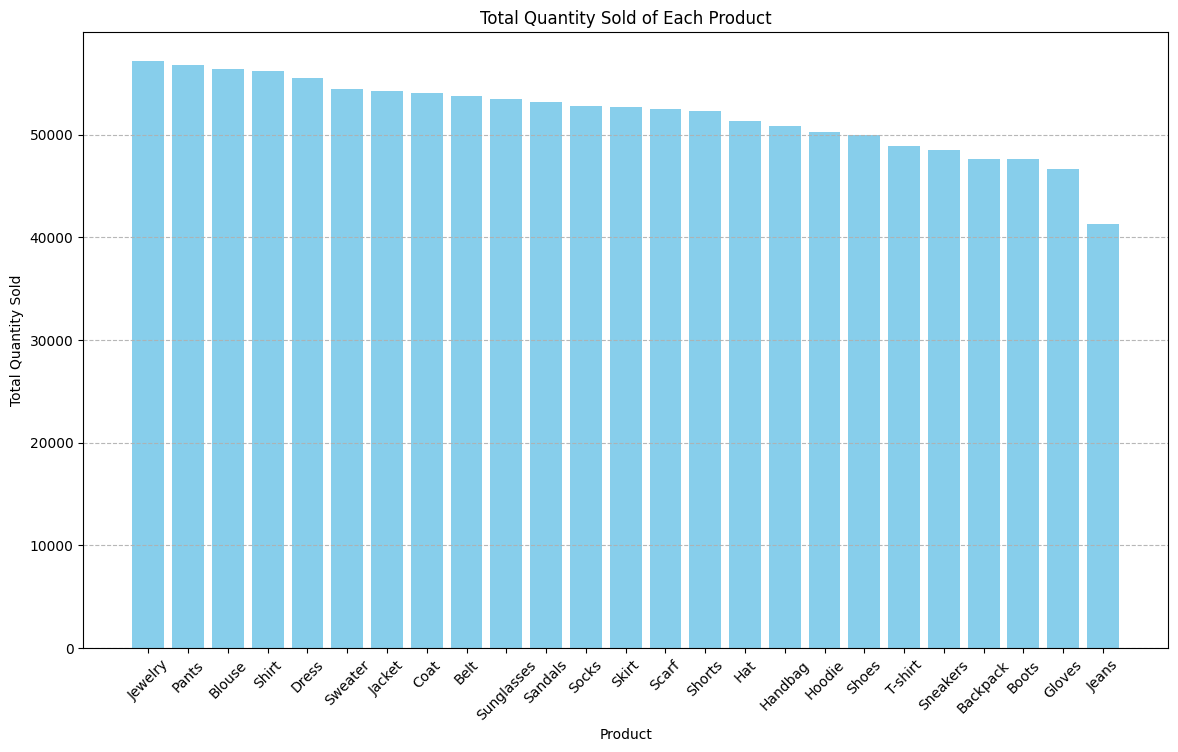

In [13]:
# Extract product names and total quantities
product_names = [item[0] for item in sorted_product_Sum]
total_quantities = [item[1] for item in sorted_product_Sum]

# Plotting the bar chart
plt.figure(figsize=(14, 8))
plt.bar(product_names, total_quantities, color='skyblue')

# Adding titles and labels
plt.title('Total Quantity Sold of Each Product')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.9)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

Finding the number of unique years that make up the datset

In [14]:
# Listing all unique years on the dataset
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], dayfirst=True, format='mixed') # Convert 'Purchase Date' to datetime
data['Purchase Date'].dt.year.unique()

array([2023, 2021, 2020, 2022], dtype=int32)

How much revenue was made each year?

In [15]:
# Total purchase by Year
By_Year = data.groupby(data['Purchase Date'].dt.year)['Total Purchase Amount'].sum()
By_Year.apply(lambda x: f'{x:,}') # applied f-string using lambda function to make the values easily readable

,Total Purchase Amount
Purchase Date,
2020,"370,153,678"
2021,"366,515,884"
2022,"367,270,229"
2023,"258,749,191"


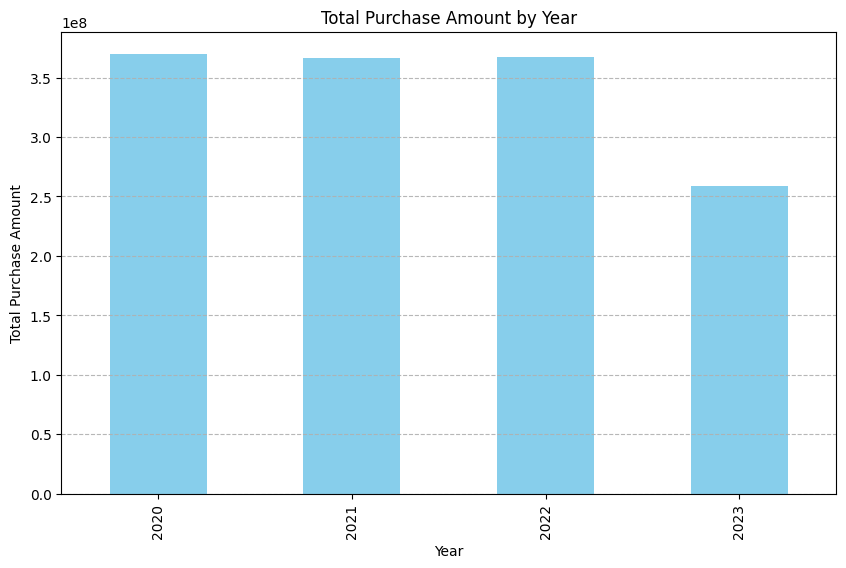

In [16]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
By_Year.plot(kind='bar', color='skyblue')

# Titles and labels
plt.title('Total Purchase Amount by Year')
plt.xlabel('Year')
plt.ylabel('Total Purchase Amount')

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.9)

# Show the plot
plt.show()

In [17]:
# Total Purchase for the 4 years
f'{By_Year.sum():,}' # applied f-string using lambda function to make the values easily readable

'1,362,688,982'

Years and Months with most and least sales

In [18]:
"""
The 'Purchase Date' will be parsed with "pd.to_datetime()" to extract the months correctly because of the inconsistencies
in the date formate (e.g., 3/5/2023 21:30 versus 16/05/2021 13:57) of our data.

"""
# Using the 'dayfirst' parameter and set 'format' to 'mixed' to handle inconsistent date formats in our data
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], dayfirst=True, format='mixed')

# Group by both year and month, and sum the 'Total Purchase Amount'
by_month_year = data.groupby([data['Purchase Date'].dt.year, data['Purchase Date'].dt.month])['Total Purchase Amount'].sum()

# Find the year and month with the highest total purchase amount
year_month_with_highest_purchase = by_month_year.idxmax()
highest_purchase_amount = by_month_year.max()

# Find the year and month with the lowest total purchase amount
year_month_with_lowest_purchase = by_month_year.idxmin()
lowest_purchase_amount = by_month_year.min()

# Extract year and month from the index for output
high_year, high_month = year_month_with_highest_purchase
low_year, low_month = year_month_with_lowest_purchase

print(f"Year and month with highest purchase amount: {high_year}-{high_month:02d}, Amount: £{highest_purchase_amount:,}")
print('''
===========================================
===========================================
''')
print(f"Year and month with lowest purchase amount: {low_year}-{low_month:02d}, Amount: £{lowest_purchase_amount:,}")


Year and month with highest purchase amount: 2020-08, Amount: £31,893,070


Year and month with lowest purchase amount: 2023-11, Amount: £4,446,837


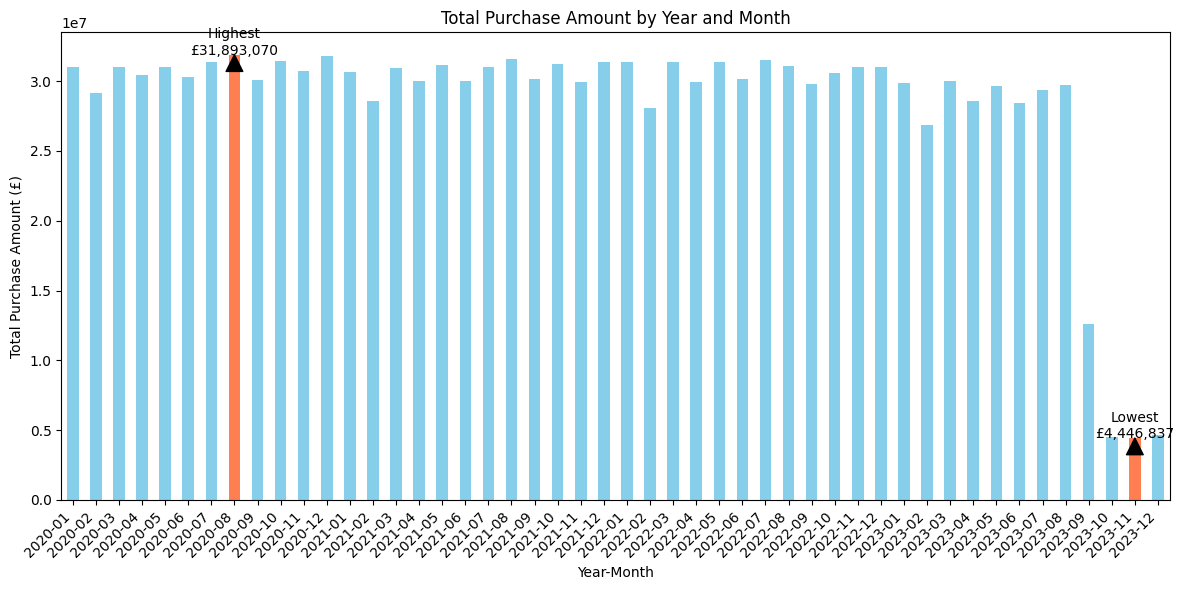

In [19]:

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot total purchase amounts by year and month
bars = by_month_year.plot(kind='bar', color='skyblue', ax=ax)

# Highlight the bars with the highest and lowest purchase amounts
highlight_color = 'coral'
highlight_idx = [by_month_year.index.get_loc((high_year, high_month)), by_month_year.index.get_loc((low_year, low_month))]
for i in highlight_idx:
    bars.patches[i].set_facecolor(highlight_color)

# Format the x-axis labels to show year-month
ax.set_xticks(range(len(by_month_year)))
ax.set_xticklabels([f"{year}-{month:02d}" for year, month in by_month_year.index], rotation=45, ha='right')

# Add labels and title
ax.set_xlabel('Year-Month')
ax.set_ylabel('Total Purchase Amount (£)')
ax.set_title('Total Purchase Amount by Year and Month')

# Add annotations for highest and lowest
for idx, (year_month, amount) in enumerate([((high_year, high_month), highest_purchase_amount), ((low_year, low_month), lowest_purchase_amount)]):
    ax.annotate(f'{"Highest" if idx == 0 else "Lowest"}\n£{amount:,}',
                xy=(by_month_year.index.get_loc(year_month), amount),
                xytext=(by_month_year.index.get_loc(year_month), amount + 500),
                arrowprops=dict(facecolor='black', shrink=0.05),
                ha='center')

plt.tight_layout()
plt.show()


Dates with the most and least sales

In [20]:

# Convert 'Purchase Date' to datetime
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], dayfirst=True)

# Group by date (year, month, day) only and sum the 'Total Purchase Amount'
by_date = data.groupby(data['Purchase Date'].dt.date)['Total Purchase Amount'].sum()

# Find the date with the highest total purchase amount
date_with_highest_purchase = by_date.idxmax()
highest_purchase_amount = by_date.max()

# Find the date with the lowest total purchase amount
date_with_lowest_purchase = by_date.idxmin()
lowest_purchase_amount = by_date.min()

print(f"Date with highest purchase amount: {date_with_highest_purchase}, Amount: £{highest_purchase_amount:,}")
print('''
===========================================
===========================================
''')
print(f"Date with lowest purchase amount: {date_with_lowest_purchase}, Amount: £{lowest_purchase_amount:,}")


Date with highest purchase amount: 2020-09-12, Amount: £1,197,629


Date with lowest purchase amount: 2023-09-15, Amount: £269,376


Dates and times with the most and least sales

In [21]:
# Convert 'Purchase Date' to datetime
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], dayfirst=True)

# Group by the full datetime (including time) and sum the 'Total Purchase Amount'
by_datetime = data.groupby(data['Purchase Date'])['Total Purchase Amount'].sum()

# Find the datetime with the highest total purchase amount
datetime_with_highest_purchase = by_datetime.idxmax()
highest_purchase_amount = by_datetime.max()

# Find the datetime with the lowest total purchase amount
datetime_with_lowest_purchase = by_datetime.idxmin()
lowest_purchase_amount = by_datetime.min()

print(f"Datetime with highest purchase amount: {datetime_with_highest_purchase}, Amount: £{highest_purchase_amount:,}")
print('''
===========================================
===========================================
''')
print(f"Datetime with lowest purchase amount: {datetime_with_lowest_purchase}, Amount: £{lowest_purchase_amount:,}")


Datetime with highest purchase amount: 2021-06-22 00:02:00, Amount: 18,801


Datetime with lowest purchase amount: 2020-06-08 16:14:00, Amount: 100


**Average Price spent per age group**

In [38]:
# Average of Total purchase by Age
Ave_purchase_by_age = data.groupby('Age')['Total Purchase Amount'].mean().sort_values(ascending= True)
Ave_purchase_by_age.head(10)

,Total Purchase Amount
Age,
19,2579.373226
20,2593.831082
21,2596.970161
18,2612.719743
22,2615.567402
23,2617.680349
26,2622.534954
27,2631.888078
25,2634.813701


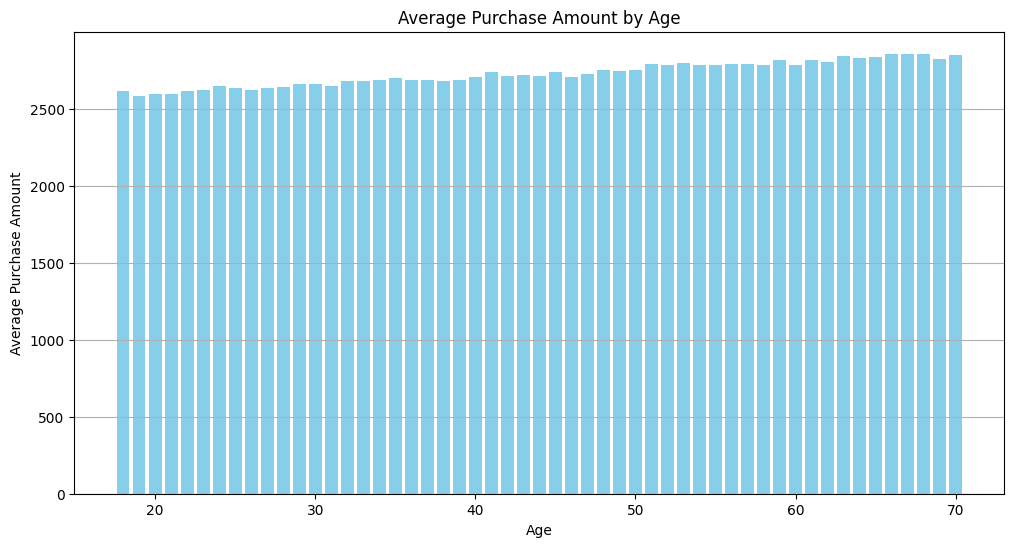

In [23]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(Ave_purchase_by_age.index, Ave_purchase_by_age.values, color='skyblue')

# Titles and labels
plt.title('Average Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')

# Adding grid for better readability
plt.grid(True, axis='y')

# Show the plot
plt.show()

**Average Price spent per age group**

In [24]:
# Average of Total purchase by Age
data.groupby('Age')['Total Purchase Amount'].mean().sort_values(ascending= False).head(20)

,Total Purchase Amount
Age,
68,2856.231787
67,2856.138489
66,2853.314596
70,2849.363342
63,2842.010849
65,2836.041856
64,2829.500776
69,2823.413374
59,2816.196087


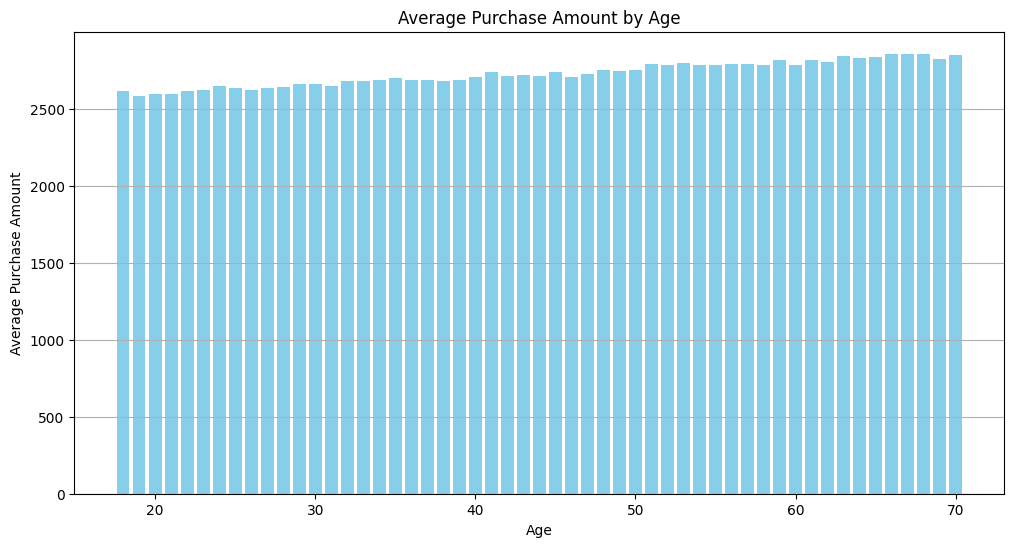

In [25]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(Ave_purchase_by_age.index, Ave_purchase_by_age.values, color='skyblue')

# Titles and labels
plt.title('Average Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')

# Adding grid for better readability
plt.grid(True, axis='y')

# Show the plot
plt.show()

**Total expenses by age**

In [26]:
Sum_expenses_per_age = data.groupby('Age')['Total Purchase Amount'].sum().sort_values(ascending= False)
Sum_expenses_per_age.apply(lambda x: f'{x:,}') # applied f-string using lambda function to make the values easily readable

,Total Purchase Amount
Age,
64,"27,330,148"
70,"27,313,997"
68,"27,208,464"
51,"26,966,361"
67,"26,810,572"
69,"26,726,431"
63,"26,720,586"
61,"26,698,288"
56,"26,670,164"


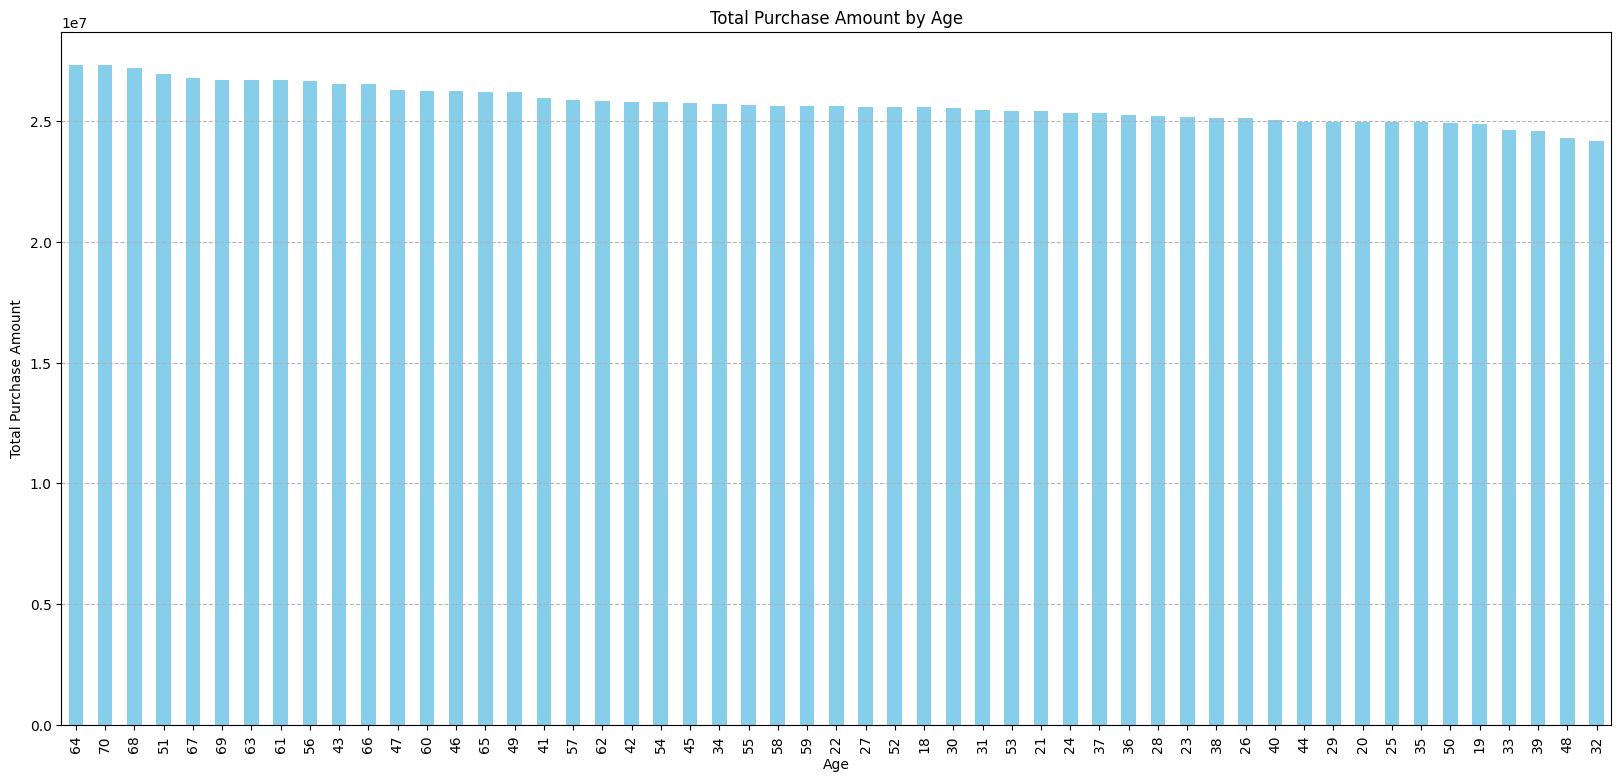

In [27]:
# Plotting the bar chart
plt.figure(figsize=(20, 9))
Sum_expenses_per_age.plot(kind='bar', color='skyblue')

# Titles and labels
plt.title('Total Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Total Purchase Amount')

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.9)

# Show the plot
plt.show()

Total amount spent by gender

In [28]:
# Finding Total purchase per gender
by_gender = data.groupby('Gender')['Total Purchase Amount'].sum().sort_values(ascending= False)
by_gender.apply(lambda x: f'{x:,}') # applied f-string using lambda function to make the values easily readable

,Total Purchase Amount
Gender,
Male,"681,667,105"
Female,"681,021,877"


Average age for both genders

In [29]:
# Average age for both genders
data.groupby('Gender')['Age'].mean()

,Age
Gender,
Female,43.874930
Male,43.863879


To develope a recommendation model without explicit customer ratings, we would use the **Matrix Factorization** techniques **Alternating Least Squares (ALS)**. This is because our data lacks direct feedback, we rely on implicit signals such as product quantities purchased. ALS helps uncover such implicit feedbacks patterns in customer interactions with products.

In [30]:
# data.drop(columns=['Purchase Date','Product Price','Total Purchase Amount','Payment Method','Age','Gender'],axis=1, inplace=True)
# data

In [31]:
#Mapping Customer ID and Item Purcahsed to unique indices
data['customer_ids'] = data['Customer ID'].astype('category').cat.codes
data['item_ids'] = data['Item Purchased'].astype('category').cat.codes

In [32]:
data.head(20)

,Customer ID,Purchase Date,Product Price,Quantity,Total Purchase Amount,Payment Method,Age,Gender,Item Purchased,customer_ids,item_ids
0,44605,2023-05-03 21:30:00,177,0,2427,PayPal,31,Female,Blouse,44602,2
1,44605,2021-05-16 13:57:00,174,2,2448,PayPal,31,Female,Sweater,44602,23
2,44605,2020-07-13 06:16:00,413,0,2345,Credit Card,31,Female,Jeans,44602,11
3,44605,2023-01-17 13:14:00,396,3,937,Cash,31,Female,Sandals,44602,14
4,44605,2021-05-01 11:29:00,259,3,2598,PayPal,31,Female,Blouse,44602,2
5,13738,2022-08-25 06:48:00,191,2,3722,Credit Card,27,Female,Sneakers,13736,20
6,13738,2023-07-25 05:17:00,205,1,2773,Credit Card,27,Female,Shirt,13736,16
7,13738,2023-02-05 19:31:00,370,4,1486,Cash,27,Female,Shorts,13736,18
8,13738,2021-12-21 03:29:00,12,2,2175,Cash,27,Female,Coat,13736,4
9,13738,2023-02-09 00:53:00,40,4,4327,Cash,27,Female,Handbag,13736,7


In [44]:
pivot = pd.pivot_table(data, values= 'Quantity', index= ['customer_ids', 'Gender'], columns= 'Item Purchased', aggfunc= 'sum', fill_value= 0)
pivot.head(20)

Item Purchased       Backpack  Belt  Blouse  Boots  Coat  Dress  Gloves  \
customer_ids Gender                                                       
0            Female         0     0       0      0     5      0       0   
             Male           0     0       0      4     0      0       0   
1            Female         0     0       0      5     0      0       0   
2            Female         0     0       5      0     0      1       0   
             Male           0     0       0      0     0      0       0   
3            Male           0     0       0      0     0      0       4   
4            Female         0     0       0      7     1      5       0   
5            Female         0     0       2      4     4      0       0   
6            Female         0     0       0      0     0      0       0   
             Male           0     0       0      3     4      2       0   
7            Female         0     0       0      0     1      0       4   
             Male           0     0       0      0     0      4       0   
8            Female         0     0       0      0     0      0       0   
9            Female         0     2       0      2     3      0       0   
10           Female         0     0       0      0     1      0       0   
             Male           0     0       0      0     0      0       0   
11           Male           2     0       0      0     3      0       0   
12           Female         2     0       0      0     0      0       0   
             Male           0     0       5      0     0      0       0   
13           Female         0     0       0      0     4      0       0   

Item Purchased       Handbag  Hat  Hoodie  ...  Scarf  Shirt  Shoes  Shorts  \
customer_ids Gender                        ...                                
0            Female        5    0       0  ...      0      0      0       0   
             Male          0    0       0  ...      0      0      0       0   
1            Female        3    0       0  ...      0      0      0       4   
2            Female        0    0       2  ...      0      0      0       2   
             Male          3    0       0  ...      5      0      4       0   
3            Male          0    0       0  ...      2      1      0       0   
4            Female        1    3       0  ...      0      9      0       0   
5            Female        3    0       1  ...      0      0      0       4   
6            Female        0    0       0  ...      0      0      0       4   
             Male          0    0       0  ...      0      7      0       0   
7            Female        0    0       0  ...      0      0      0       0   
             Male          0    4       0  ...      1      0      0       0   
8            Female        0    7       0  ...      0      1      0       3   
9            Female        0    0       3  ...      4      0      0       8   
10           Female        7    0       0  ...      0      0      0       0   
             Male          2    0       0  ...      0      0      4       3   
11           Male          0    0       7  ...      4      3      2       0   
12           Female        0    0       0  ...      3      0      1       0   
             Male          0    0       0  ...      0      0      5       0   
13           Female        2    0       0  ...      0      5      0       0   

Item Purchased       Skirt  Sneakers  Socks  Sunglasses  Sweater  T-shirt  
customer_ids Gender                                                        
0            Female      0         0      0           5        0        0  
             Male        0         0      0           0        0        0  
1            Female      0         2      1           0        0        0  
2            Female      0         0      0           0        3        1  
             Male        0         0      0           0        0        0  
3            Male        2         0      3           0        0        2  
4 

In [40]:
# Converting to sparse matrix format for efficient computation, as sparse matrix holds only none zero values and as we can see above not all customer purchased all products hence we have a lot of zeros.
csr = csr_matrix(pivot) # we convert to csr format because ALS model only works with csr data
print(type(csr))

<class 'scipy.sparse._csr.csr_matrix'>


**Model creation and Training**

In [41]:
# Apply matrix factorization (ALS)
als_model = AlternatingLeastSquares(factors=10, regularization=0.1, iterations=20) # Initialise the ALS model
als_model.fit(csr)  # Train the ALS model with the data.

  0%|          | 0/20 [00:00<?, ?it/s]

**TESTING THE MODEL**

In [45]:
# def recommend_products(customer_ids, Gender):
#   # Check if the (customer_ids, Gender) pair exists for gender
#     if (customer_ids, Gender) not in pivot.index:
#         return []  # Customer-Gender combintion not found in the pivot table

#     customer_index = list(pivot.index).index(customer_ids, Gender)

#     # Extract the row corresponding to the customer from the CSR matrix
#     user_interactions = csr[customer_index]

#     # Reshape user_interactions to ensure it's a 2D array with one row
#     user_interactions = user_interactions.reshape(1, -1)

#     # Get recommendations from the ALS model
#     raw_recommendations = als_model.recommend(customer_index, user_interactions, N=4)

#     # Print the raw recommendations for debugging
#     print("Raw recommendations:", raw_recommendations)

#     # Extract item indices from recommendations correctly
#     recommended_indices = list(raw_recommendations[0])

#     # Print the recommended indices for debugging
#     print("Recommended indices:", recommended_indices)

#     # Map indices to product names
#     recommended_products = [pivot.columns[index] for index in recommended_indices]

#     # Print the final recommended products for debugging
#     print("Recommended products:", recommended_products)

#     return recommended_products

# # Example usage:
# recommendations = recommend_products(49995, 'Female')
# print("Final recommendations:", recommendations)
def recommend_products(customer_ids, Gender):
    # Check if the (customer_ids, Gender) pair exists for gender
    if (customer_ids, Gender) not in pivot.index:
        return []  # Customer-Gender combination not found in the pivot table

    # Use a tuple to directly access the index in the DataFrame
    customer_index = pivot.index.get_loc((customer_ids, Gender))

    # Extract the row corresponding to the customer from the CSR matrix
    user_interactions = csr[customer_index]

    # Reshape user_interactions to ensure it's a 2D array with one row
    user_interactions = user_interactions.reshape(1, -1)

    # Get recommendations from the ALS model
    raw_recommendations = als_model.recommend(customer_index, user_interactions, N=4)

    # Print the raw recommendations for debugging
    print("Raw recommendations:", raw_recommendations)

    # Extract item indices from recommendations correctly
    recommended_indices = list(raw_recommendations[0])

    # Print the recommended indices for debugging
    print("Recommended indices:", recommended_indices)

    # Map indices to product names
    recommended_products = [pivot.columns[index] for index in recommended_indices]

    # Print the final recommended products for debugging
    print("Recommended products:", recommended_products)

    return recommended_products

# Example usage:
recommendations = recommend_products(3, 'Male')
print("Final recommendations:", recommendations)

Raw recommendations: (array([ 8, 18, 13, 17], dtype=int32), array([0.74983215, 0.7121743 , 0.7066561 , 0.67995876], dtype=float32))
Recommended indices: [8, 18, 13, 17]
Recommended products: ['Hat', 'Shorts', 'Pants', 'Shoes']
Final recommendations: ['Hat', 'Shorts', 'Pants', 'Shoes']


**EVALUATING THE MODEL**